In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/janestreet-parquet/train.parquet


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import gc


# Explore data

In [3]:
# Load data
data = pd.read_parquet('../input/janestreet-parquet/train.parquet')
data.head()

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
0,0,0.000000,0.009916,0.014079,0.008773,0.001390,0.006270,1,-1.872746,-2.191242,-0.474163,-0.323046,0.014688,-0.002484,NaN,NaN,-0.989982,-1.055090,NaN,NaN,-2.667671,-2.001475,-1.703595,-2.196892,NaN,NaN,1.483295,1.307466,NaN,NaN,1.175200,0.967805,1.608410,1.319365,NaN,NaN,-0.515073,-0.448988,NaN,NaN,-2.429812,-2.206423,-3.593120,-2.868358,0.112697,0.053157,-0.539956,-0.692187,3.491282,-1.684889,1.337123,-0.328607,1.689207,-1.052243,-1.870885,-1.789342,-1.574173,-1.120820,-0.571920,-1.093033,0.703515,5.936281,NaN,3.315812,1.291338,2.468825,2.490069,-1.148239,-0.961935,-2.263944,-2.158765,-5.012022,-2.006825,-1.284090,-2.141697,-2.054935,-1.851203,-1.431184,-1.634481,NaN,-0.373934,NaN,0.559241,0.891368,0.271700,NaN,-1.521125,NaN,3.045337,3.260512,0.683558,NaN,-0.109194,NaN,0.488806,1.447504,-2.790902,NaN,1.158770,NaN,3.754522,7.137163,-1.863069,NaN,0.434466,NaN,-0.292035,0.317003,-2.605820,NaN,2.896986,NaN,1.485813,4.147254,-2.238831,NaN,-0.892724,NaN,-0.156332,0.622816,-3.921523,NaN,2.561593,NaN,3.457757,6.649580,-1.472686,NaN,NaN,1.168391,8.313583,1.782433,14.018213,2.653056,12.600292,2.301488,11.445807,0
1,0,16.673515,-0.002828,-0.003226,-0.007319,-0.011114,-0.009792,-1,-1.349537,-1.704709,0.068058,0.028432,0.193794,0.138212,NaN,NaN,-0.151877,-0.384952,NaN,NaN,1.225838,0.789076,1.110580,1.102281,NaN,NaN,-0.590600,-0.625682,NaN,NaN,-0.543425,-0.547486,-0.706600,-0.667806,NaN,NaN,0.910558,0.914465,NaN,NaN,2.137454,2.080459,2.819291,2.483965,-0.086755,-0.082687,0.368431,0.469196,5.711996,-2.215132,0.796703,-1.140081,0.716617,-0.059431,-0.198920,-0.326697,-0.381770,1.435607,3.401393,2.486748,-2.014598,-0.390588,NaN,-0.027262,-1.886927,-1.706450,-0.888236,-1.138294,-0.954461,-1.350633,-1.459546,-4.564815,-2.651966,-1.620014,-2.240625,-2.147273,-0.255224,3.202946,-0.535872,NaN,-0.050948,NaN,0.141089,0.058363,0.131190,NaN,-0.121239,NaN,0.677553,0.045842,-0.124616,NaN,-0.007004,NaN,-0.410491,-0.024323,-3.012654,NaN,1.157671,NaN,1.297679,1.281956,-2.427595,NaN,0.024913,NaN,-0.413607,-0.073672,-2.434546,NaN,0.949879,NaN,0.724655,1.622137,-2.209020,NaN,-1.332492,NaN,-0.586619,-1.040491,-3.946097,NaN,0.983440,NaN,1.357907,1.612348,-1.664544,NaN,NaN,-1.178850,1.777472,-0.915458,2.831612,-1.417010,2.297459,-1.304614,1.898684,1
2,0,0.000000,0.025134,0.027607,0.033406,0.034380,0.023970,-1,0.812780,-0.256156,0.806463,0.400221,-0.614188,-0.354800,NaN,NaN,5.448261,2.668029,NaN,NaN,3.836342,2.183258,3.902698,3.045431,NaN,NaN,-1.141082,-0.979962,NaN,NaN,-1.157585,-0.966803,

## 1. Drop date <= 85

**There is indeed a marked aberration on day 85. Here I plot the daily  pi  against date. As defined under the competition evaluation tab for each date i, we have:**

$$
p_i = \sum_j(weight_{ij} * resp_{ij} * action_{ij}),
$$




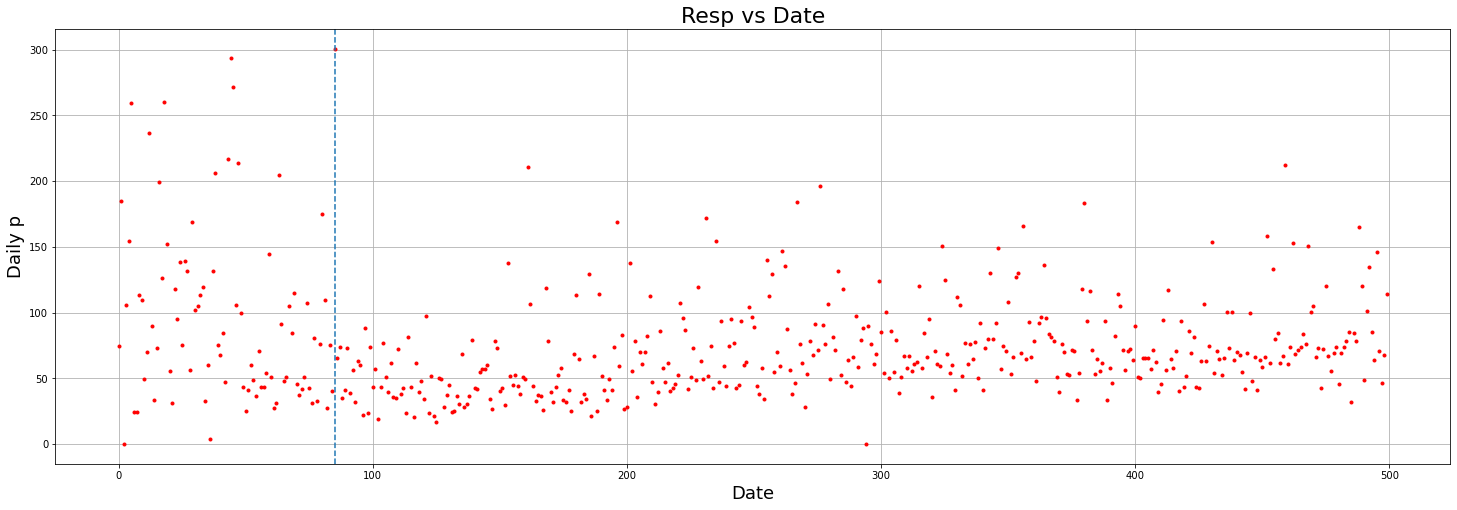

In [7]:
# plot the daily pi against date 
# the vertical line represents day 85

target = 'resp'

dailyp = pd.DataFrame(index=data['date'].unique(), columns=[target])
dailyp.index.name = 'date'
df = data.loc[ data[target]>0 ].copy() # take action if resp >0
dailyp[target] = df.groupby('date', sort=False).apply(lambda x: (x['weight'] * x[target]).sum())

fig, ax = plt.subplots(figsize=(25, 8))
ax.plot(dailyp.index, dailyp[target], '.r')
ax.axvline(85, linestyle='--')# day 85 marker
ax.grid()
ax.set_xlabel('Date', fontsize=18)
ax.set_ylabel('Daily p', fontsize=18) 
ax.set_title('Resp vs Date', fontsize=22)
plt.show()

**We can observe that the Pi before day 86 has a more sparse pattern than the remainder.**

**Let's plot the number of ts_id per day**

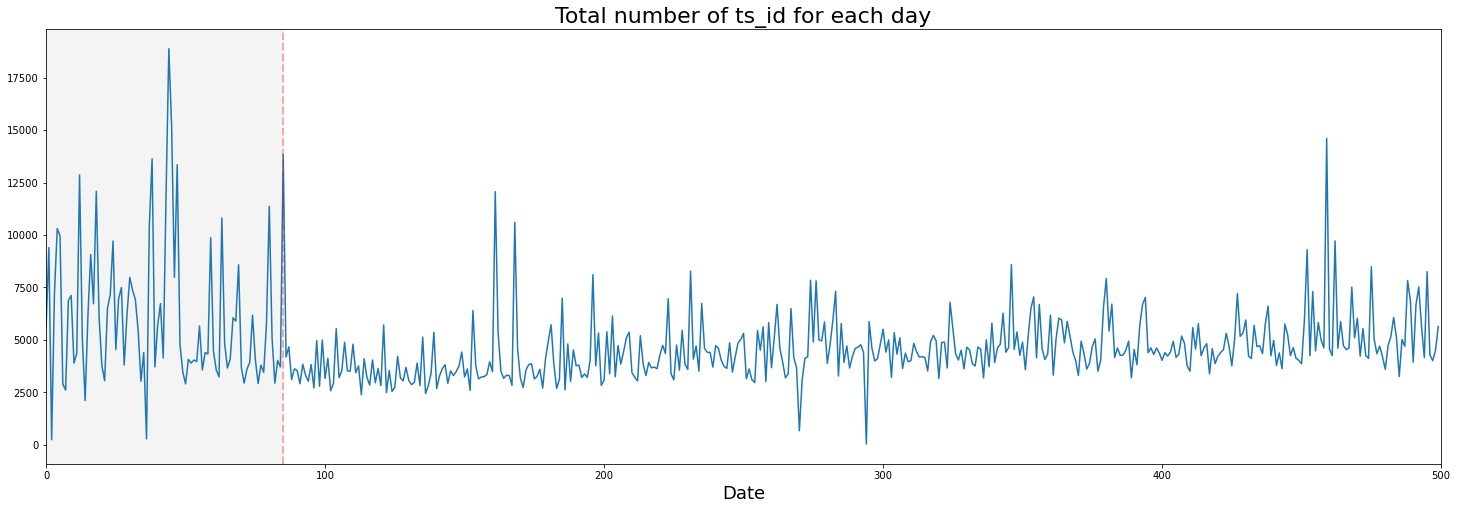

In [8]:
# Let's plot the number of ts_id per day
# the vertical line represents day 85

trades_per_day = data.groupby(['date'])['ts_id'].count()
fig, ax = plt.subplots(figsize=(25, 8))
plt.plot(trades_per_day)
ax.set_xlabel ("Date", fontsize=18)
ax.set_title ("Total number of ts_id for each day", fontsize=22)
# day 85 marker
ax.axvline(x=85, linestyle='--', alpha=0.3, c='red', lw=2)
ax.axvspan(0, 85 , color=sns.xkcd_rgb['grey'], alpha=0.1)
ax.set_xlim(xmin=0)
ax.set_xlim(xmax=500)
plt.show()

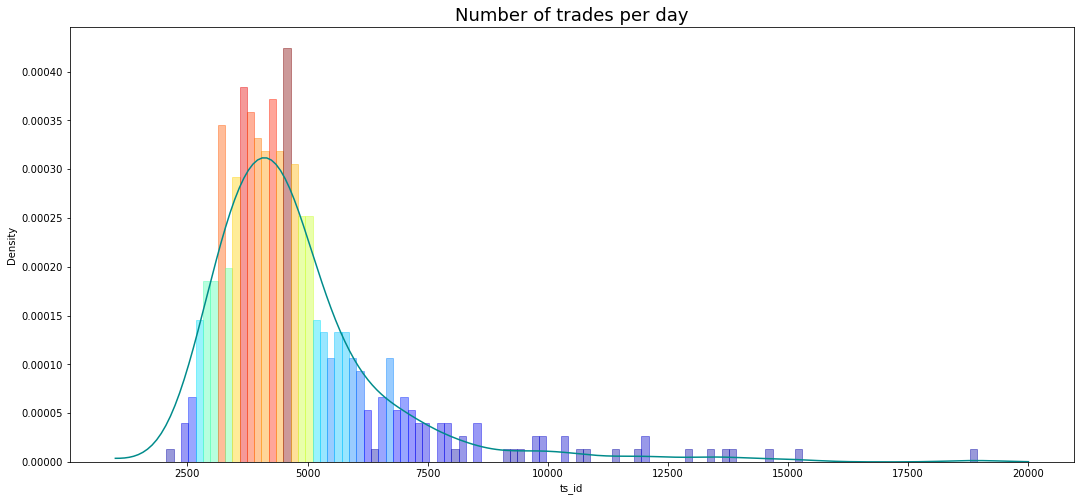

In [10]:
# Plot the distribution of trades per day
fig, ax = plt.subplots(figsize=(18, 8))
sns.distplot(trades_per_day, 
             bins=125, 
             kde_kws={"clip":(1000,20000)}, 
             hist_kws={"range":(1000,20000)},
             color='darkcyan', 
             kde=True);
values = np.array([rec.get_height() for rec in ax.patches])
norm = plt.Normalize(values.min(), values.max())
colors = plt.cm.jet(norm(values))
for rec, col in zip(ax.patches, colors):
    rec.set_color(col)
ax.set_title("Number of trades per day", fontsize=18)
plt.show();

**If that is the case, then 'volitile' days, say with more than 9k trades (i.e. ts_id) per day, are the following**

In [15]:
volitile_days = pd.DataFrame(trades_per_day[trades_per_day > 9000])
volitile_days.T

date,1,4,5,12,16,18,24,37,38,43,44,45,47,59,63,80,85,161,168,452,459,462
ts_id,9401,10305,9965,12866,9069,12082,9708,10399,13631,11872,18884,15174,13351,9873,10805,11366,13842,12064,10607,9294,14603,9718


**It is interesting to note that almost all of the days having a large volume of trades are before and up to date 85.
The consensus seems to be that a change in the market took place around that time (perhaps a mean-reverting market changing to a momentum market, or vice versa). That said, we should drop rows having date <= 85 to better performance when training the model.**

In [11]:
# drop date <= 85
data = data[data['date'] > 85]
data.shape

(1862597, 138)

## 2. Check useless rows and fill null values

**Trades with weight = 0 were intentionally included in the dataset for completeness, although such trades will not contribute towards the scoring evaluation.**

In [12]:
print(f"Percentage of zero weights is: {((sum(data['weight'] == 0))/len(data))*100}%")


Percentage of zero weights is: 15.633118704690279%


**We observe that percentage of zero weights is 15.6%, and since these weights would not contribute to towards scoring evaluation, we can drop them.**

In [13]:
# Select trade with weight !=  0:
data = data[data['weight'] != 0]

**Now we will check and fill null values.**

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1571415 entries, 527894 to 2390489
Columns: 138 entries, date to ts_id
dtypes: float64(135), int64(3)
memory usage: 1.6 GB


In [15]:
# limit memory use: we change datatype from float64 to float32
data = data.astype({c: np.float32 for c in data.select_dtypes(include='float64').columns}) 


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1571415 entries, 527894 to 2390489
Columns: 138 entries, date to ts_id
dtypes: float32(135), int64(3)
memory usage: 857.2 MB


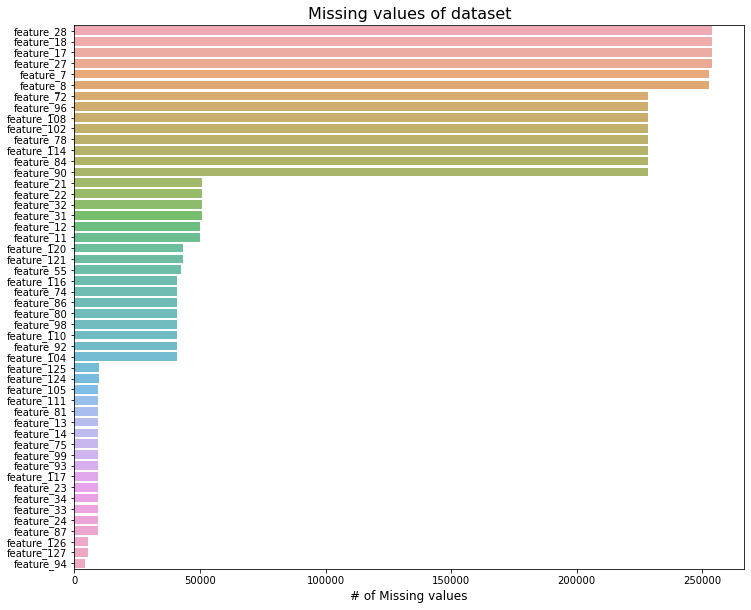

In [20]:
# check null data
data_null = data.isna().sum().to_frame(name = 'Null values')
data_null = data_null[data_null['Null values']>0]
data_null.sort_values(by='Null values', ascending = False, inplace = True)

fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(y = data_null.index[:50], 
            x = data_null['Null values'][:50], 
            alpha = 0.8
            )
ax.set_title('Missing values of dataset', fontsize=16)
ax.set_xlabel('# of Missing values', fontsize=12)
plt.show()

**Data has a lot of missing values. I am adding mean value as a missing value for these data points because of the zero/mean reversion strategy that I think has been used here.**

In [21]:
# fill null values with mean of each feature
data.fillna(data.mean(),inplace=True)

# create target variable
data['action'] = (data['resp'] > 0).astype('int')

#create fetures list
features = [c for c in data.columns if 'feature' in c]

## 3. Check data imbalance

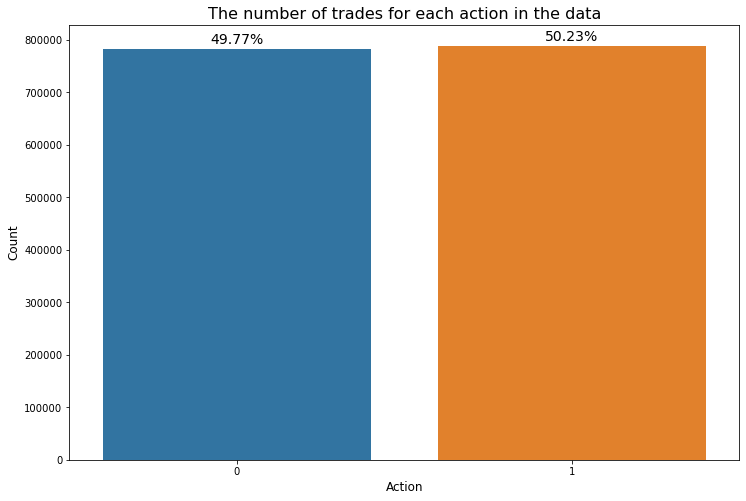

In [28]:
# Check data imbalance:
freq = len(data)

fig, ax = plt.subplots(figsize = (12,8))

sns.countplot(data['action'], ax = ax)
ax.set_xlabel("Action", fontsize = 12)
ax.set_ylabel("Count", fontsize = 12)
ax.set_title("The number of trades for each action in the data", fontsize = 16)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 10000,
          '{:1.2f}%'.format(height / freq * 100),
          ha = "center", fontsize = 14)
plt.show()


**We can observe that the classes are balanced.**

In [34]:
gc.collect()

5061

# 4. Plot feature's correlation and Dimensionality reduction

**Plot correlation heatmap**

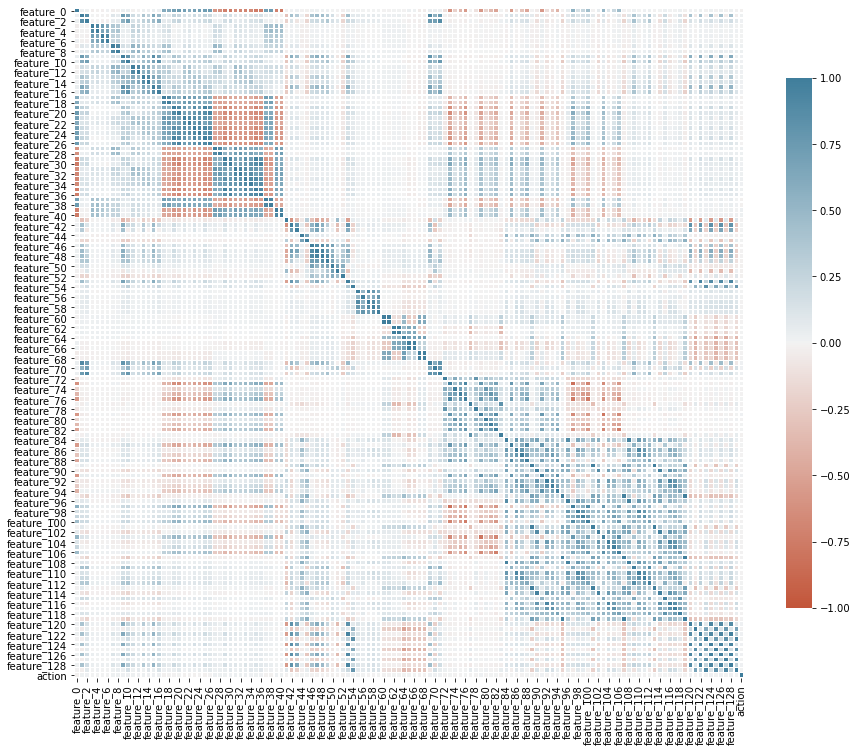

In [18]:
# # Plot correlation heatmap
corr = data[features+['action']].corr()


fig, ax = plt.subplots(figsize=(15, 13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(20, 230, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.75})

plt.show()

**Perform PCA**

In [31]:
# scale data before performing PCA
# 20 / 80 split
df_trainvalid, df_test = np.split(data, [int(.8*len(data))])

df_train, df_valid = np.split(df_trainvalid, [int(.9*len(df_trainvalid))])

X_train = df_train[features]
y_train = df_train['action']


NORMALIZE_NONE = 0
NORMALIZE_MIN_MAX = 1
NORMALIZE_MEAN = 2

def normalize_data(df):
    if NORMALIZE_TYPE == NORMALIZE_MIN_MAX:
        return (df-df.min())/(df.max()-df.min())
    elif NORMALIZE_TYPE == NORMALIZE_MEAN:
        return (df-df.mean())/df.std()
    else:
        return df;
    
NORMALIZE_TYPE = NORMALIZE_MEAN

X_train = normalize_data(X_train)

pca = PCA().fit(X_train)



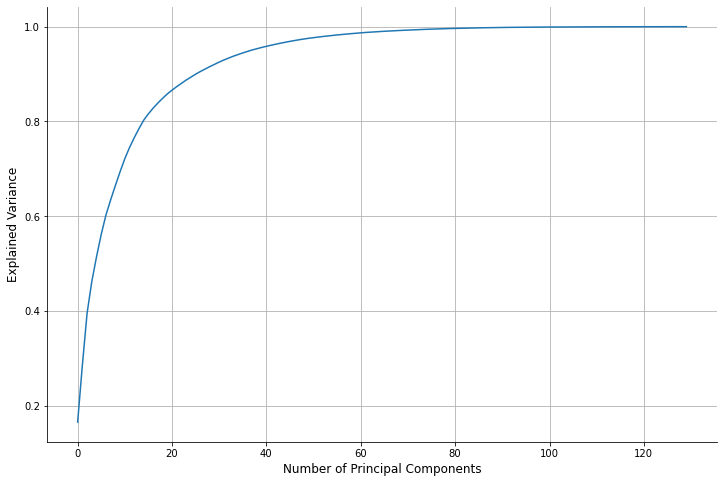

In [33]:
# Plot a graph show explained variance ratio
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.xlabel('Number of Principal Components', size = 12)
plt.ylabel('Explained Variance', size = 12)
sns.despine();



**We can observe that:**
* The first 15 principal components explains about 80% of the variation
* The first 40 principal components explains about 95% of the variation